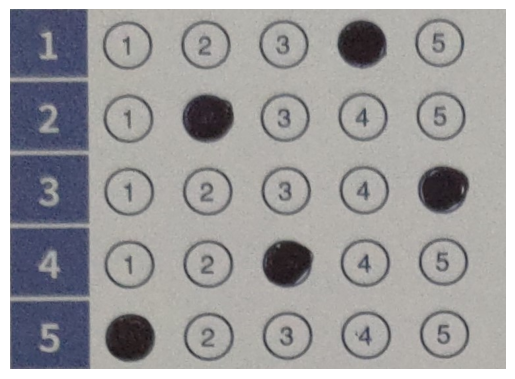

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('gabarito.jpg')

# Converter para escala de cinza
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Aplicar suavização (blur) e limiarização (binarização)
imagem_suavizada = cv2.GaussianBlur(imagem_cinza, (5, 5), 0)
_, imagem_bin = cv2.threshold(imagem_suavizada, 150, 255, cv2.THRESH_BINARY_INV)

# Detectar círculos na imagem (representando as alternativas preenchidas)
circles = cv2.HoughCircles(imagem_bin, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=20)

# Se círculos forem detectados, desenhá-los na imagem
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        # Desenhar o círculo na imagem original
        cv2.circle(imagem, (x, y), r, (0, 255, 0), 4)

# Converter de BGR para RGB (OpenCV usa BGR, Matplotlib usa RGB)
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Exibir a imagem usando Matplotlib
plt.imshow(imagem_rgb)
plt.axis('off')  # Remover eixos
plt.show()


Tentando carregar a imagem de: gabarito.jpg
Número de áreas pretas: 67


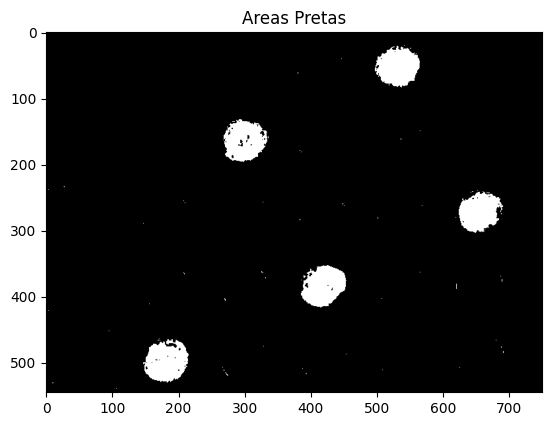

In [25]:
import cv2
import matplotlib.pyplot as plt

# Função para carregar a imagem
def carregar_imagem(caminho):
    print(f"Tentando carregar a imagem de: {caminho}")
    imagem = cv2.imread(caminho)
    if imagem is None:
        print("Erro ao carregar a imagem. Verifique o caminho.")
        exit()
    return imagem

# Função para converter a imagem para escala de cinza
def converter_para_cinza(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

# Função para aplicar o threshold
def aplicar_threshold(imagem_cinza):
    _, imagem_thresh = cv2.threshold(imagem_cinza, 50, 255, cv2.THRESH_BINARY_INV)
    return imagem_thresh

# Função para contar as áreas pretas
def contar_areas_pretas(imagem_thresh):
    contornos, _ = cv2.findContours(imagem_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contornos)

# Função principal
def main(caminho_imagem):
    imagem = carregar_imagem(caminho_imagem)
    imagem_cinza = converter_para_cinza(imagem)
    imagem_thresh = aplicar_threshold(imagem_cinza)
    numero_areas_pretas = contar_areas_pretas(imagem_thresh)
    print(f"Número de áreas pretas: {numero_areas_pretas}")

    # Exibir a imagem processada usando matplotlib
    plt.imshow(imagem_thresh, cmap='gray')
    plt.title('Areas Pretas')
    plt.show()

# Substitua pelo caminho da sua imagem
caminho_imagem = 'gabarito.jpg'

# Executa a função principal
if __name__ == "__main__":
    main(caminho_imagem)


Tentando carregar a imagem de: gabarito.jpg
Total de respostas detectadas: 5


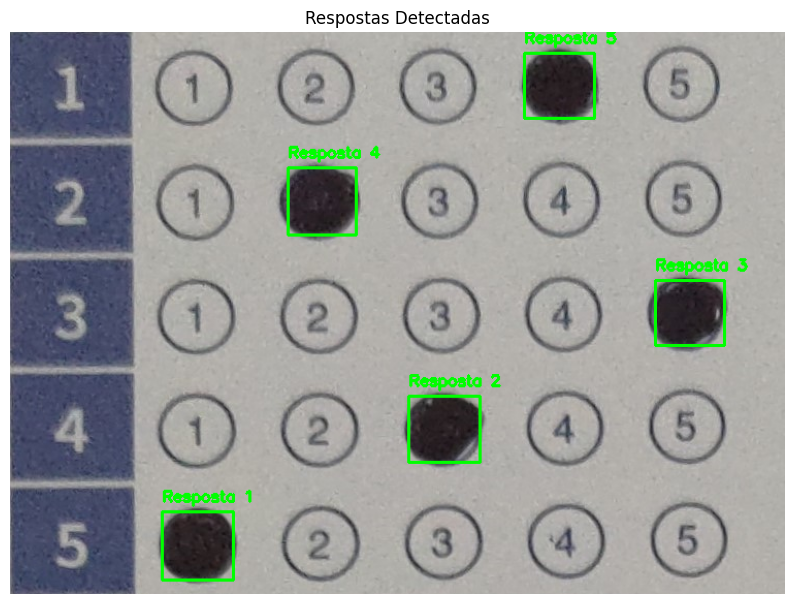

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  # Adicionei esta linha

def carregar_imagem(caminho):
    print(f"Tentando carregar a imagem de: {caminho}")
    imagem = cv2.imread(caminho)
    if imagem is None:
        print(f"Erro ao carregar a imagem. Verifique o caminho: {caminho}")
        exit()
    return imagem

def converter_para_cinza(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

def aplicar_threshold(imagem_cinza):
    _, imagem_thresh = cv2.threshold(imagem_cinza, 50, 255, cv2.THRESH_BINARY_INV)
    return imagem_thresh

def detectar_respostas(imagem_thresh):
    contornos, _ = cv2.findContours(imagem_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    respostas = []
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if area > 100:
            x, y, w, h = cv2.boundingRect(cnt)
            respostas.append((x, y, w, h))
    return respostas

def exibir_imagem(imagem):  # Nova função para exibir imagem
    plt.figure(figsize=[10,10])
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title("Respostas Detectadas")
    plt.axis('off')
    plt.show()

def main(caminho_imagem):
    imagem = carregar_imagem(caminho_imagem)
    if imagem is not None:
        imagem_cinza = converter_para_cinza(imagem)
        imagem_thresh = aplicar_threshold(imagem_cinza)
        respostas = detectar_respostas(imagem_thresh)
        
        for idx, (x, y, w, h) in enumerate(respostas):
            cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(imagem, f'Resposta {idx + 1}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        print(f"Total de respostas detectadas: {len(respostas)}")

        # Exibir a imagem com as respostas detectadas
        exibir_imagem(imagem)

# Substitua pelo caminho correto da sua imagem
caminho_imagem = 'gabarito.jpg'

# Executa a função principal
if __name__ == "__main__":
    main(caminho_imagem)


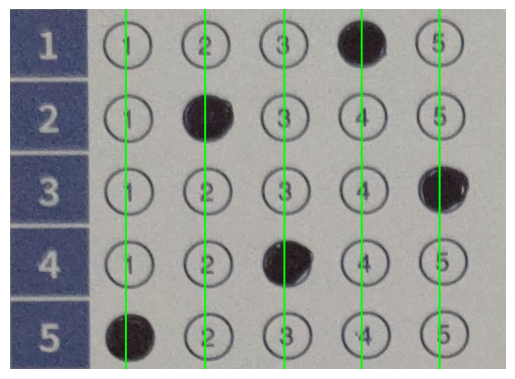

In [28]:
import cv2
import matplotlib.pyplot as plt

def exibir_imagem(imagem):
    # Converter a imagem de BGR para RGB, já que o OpenCV usa BGR e o matplotlib usa RGB
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    plt.imshow(imagem_rgb)
    plt.axis('off')  # Ocultar os eixos
    plt.show()

# Carregar a imagem
image = cv2.imread('gabarito.jpg')  # Verifique se o nome e a extensão do arquivo estão corretos

# Verifique se a imagem foi carregada corretamente
if image is None:
    print("Erro ao carregar a imagem.")
else:
    # Definir as coordenadas x para as 5 retas verticais
    x_coords = [175, 295, 415, 532, 650]  # Ajuste esses valores conforme necessário

    # Desenhar as retas verticais na imagem
    for x in x_coords:
        start_point = (x, 0)  # Início da linha (ponto na borda superior)
        end_point = (x, image.shape[0])  # Fim da linha (ponto na borda inferior)
        color = (0, 255, 0)  # Cor verde em BGR
        thickness = 2  # Espessura da linha
        cv2.line(image, start_point, end_point, color, thickness)

    # Exibir a imagem com as retas desenhadas
    exibir_imagem(image)


Tentando carregar a imagem de: D:\codigos\reconhecimento de imagem\gabarito.jpg
Círculo 1 que é o primeiro de cima para baixo que está na posição (532, 52) tem a resposta 4
Círculo 2 que é o primeiro de cima para baixo que está na posição (302, 164) tem a resposta 2
Círculo 3 que é o primeiro de cima para baixo que está na posição (658, 272) tem a resposta 5
Círculo 4 que é o primeiro de cima para baixo que está na posição (420, 385) tem a resposta 3
Círculo 5 que é o primeiro de cima para baixo que está na posição (181, 498) tem a resposta 1
Total de respostas detectadas: 5


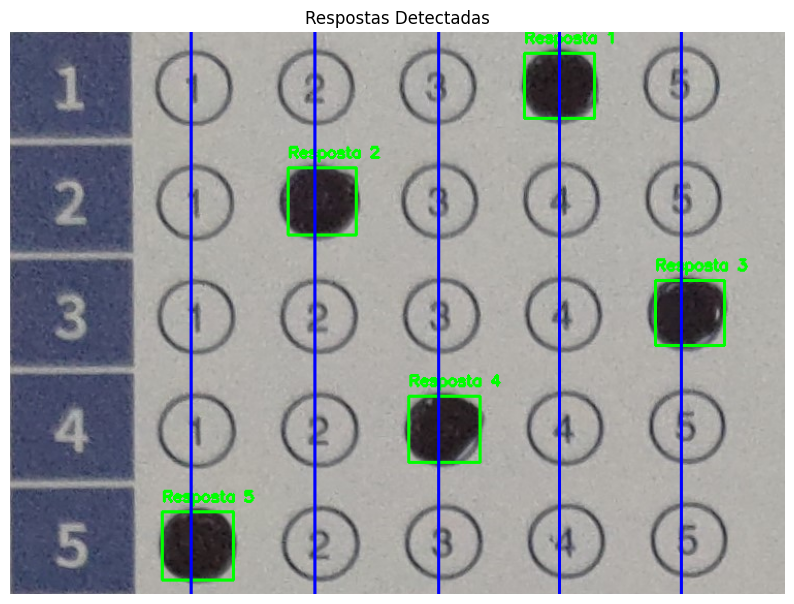

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def carregar_imagem(caminho):
    print(f"Tentando carregar a imagem de: {caminho}")
    imagem = cv2.imread(caminho)
    if imagem is None:
        print(f"Erro ao carregar a imagem. Verifique o caminho: {caminho}")
        exit()
    return imagem

def converter_para_cinza(imagem):
    return cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

def aplicar_threshold(imagem_cinza):
    _, imagem_thresh = cv2.threshold(imagem_cinza, 50, 255, cv2.THRESH_BINARY_INV)
    return imagem_thresh

def detectar_respostas(imagem_thresh):
    contornos, _ = cv2.findContours(imagem_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    respostas = []
    for cnt in contornos:
        area = cv2.contourArea(cnt)
        if area > 100:
            x, y, w, h = cv2.boundingRect(cnt)
            respostas.append((x, y, w, h))
    return sorted(respostas, key=lambda k: k[1])  # Ordena de cima para baixo por Y

def desenhar_linhas_verticais(imagem, x_coords):
    for x in x_coords:
        cv2.line(imagem, (x, 0), (x, imagem.shape[0]), (255, 0, 0), 2)

def verificar_linha_vertical(x, x_coords):
    for i, x_coord in enumerate(x_coords):
        if abs(x - x_coord) < 10:  # Ajuste a tolerância conforme necessário
            return i + 1  # Retorna números 1, 2, 3, 4, 5
    return None

def exibir_imagem(imagem):  
    plt.figure(figsize=[10, 10])
    plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))
    plt.title("Respostas Detectadas")
    plt.axis('off')
    plt.show()

def main(caminho_imagem):
    x_coords = [175, 295, 415, 532, 650]  # Coordenadas das linhas verticais

    imagem = carregar_imagem(caminho_imagem)
    if imagem is not None:
        imagem_cinza = converter_para_cinza(imagem)
        imagem_thresh = aplicar_threshold(imagem_cinza)
        respostas = detectar_respostas(imagem_thresh)
        
        for idx, (x, y, w, h) in enumerate(respostas):
            cv2.rectangle(imagem, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(imagem, f'Resposta {idx + 1}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
            linha = verificar_linha_vertical(x + w // 2, x_coords)
            if linha:
                print(f"Círculo {idx + 1} que é o primeiro de cima para baixo que está na posição ({x + w // 2}, {y + h // 2}) tem a resposta {linha}")

        print(f"Total de respostas detectadas: {len(respostas)}")

        # Desenhar as linhas verticais na imagem
        desenhar_linhas_verticais(imagem, x_coords)
        
        # Exibir a imagem com as respostas detectadas
        exibir_imagem(imagem)

# Substitua pelo caminho correto da sua imagem
caminho_imagem = r'D:\codigos\reconhecimento de imagem\gabarito.jpg'

# Executa a função principal
if __name__ == "__main__":
    main(caminho_imagem)


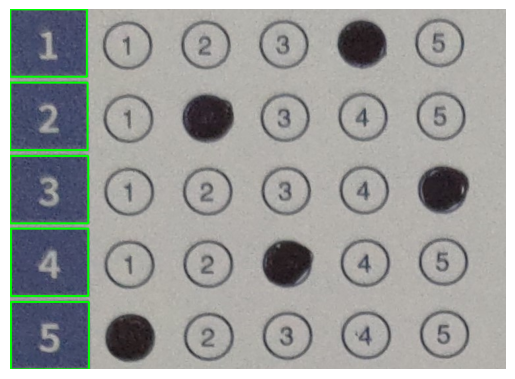

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread('gabarito.jpg')

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    raise FileNotFoundError("A imagem não foi encontrada. Verifique o caminho e o nome do arquivo.")

# Converter a imagem para o espaço de cores HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

# Definir o intervalo de cores para identificar o azul
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Criar uma máscara com base nos intervalos de cor definidos
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Encontrar os contornos dos quadrados azuis
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos que são quadrados
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.04*cv2.arcLength(contour, True), True)
    if len(approx) == 4 and cv2.contourArea(contour) > 1000:  # Certifique-se de ajustar conforme necessário
        (x, y, w, h) = cv2.boundingRect(contour)
        aspectRatio = float(w)/h
        if 0.8 <= aspectRatio <= 1.2:
            cv2.rectangle(imagem, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Desenhar retângulo verde nas áreas detectadas

# Converter imagem BGR para RGB para exibir corretamente com matplotlib
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Mostrar a imagem com os quadrados destacados usando matplotlib
plt.imshow(imagem_rgb)
plt.axis('off')  # Desliga os eixos
plt.show()


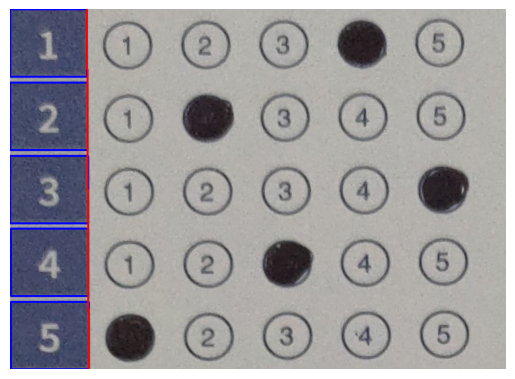

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carregar a imagem
imagem = cv2.imread(r'D:\codigos\reconhecimento de imagem\gabarito.jpg')

# Verificar se a imagem foi carregada corretamente
if imagem is None:
    raise FileNotFoundError("A imagem não foi encontrada. Verifique o caminho e o nome do arquivo.")

# Converter a imagem para o espaço de cores HSV
hsv = cv2.cvtColor(imagem, cv2.COLOR_BGR2HSV)

# Definir o intervalo de cores para identificar o azul
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Criar uma máscara com base nos intervalos de cor definidos
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Encontrar os contornos dos quadrados azuis
contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos que são quadrados
rects = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.04 * cv2.arcLength(contour, True), True)
    if len(approx) == 4 and cv2.contourArea(contour) > 1000:  # Certifique-se de ajustar conforme necessário
        (x, y, w, h) = cv2.boundingRect(contour)
        aspectRatio = float(w) / h
        if 0.8 <= aspectRatio <= 1.2:
            rects.append((x, y, x+w, y+h))
            cv2.rectangle(imagem, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Desenhar retângulo azul nos quadrados detectados

# Traçar a linha reta se houver quadrados detectados
if rects:
    # Ordenar os retângulos pelo eixo y (vertical)
    rects = sorted(rects, key=lambda r: r[1])
    # Coordenadas da linha reta
    x_start = rects[0][2]  # x do lado direito do primeiro quadrado
    y_start = rects[0][1]  # y do topo do primeiro quadrado
    x_end = rects[-1][2]   # x do lado direito do último quadrado
    y_end = rects[-1][3]   # y do final do último quadrado
    # Desenhar a linha reta
    cv2.line(imagem, (x_start, y_start), (x_end, y_end), (0, 0, 255), 2)
    
# Converter imagem BGR para RGB para exibir corretamente com matplotlib
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

# Mostrar a imagem com os quadrados destacados e a linha reta
plt.imshow(imagem_rgb)
plt.axis('off')  # Desliga os eixos
plt.show()
